In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.io as sio
import pyidd
import statsmodels.api as sm

```
correlations_desikan_old.mat
        1058 87x87 Correlation (not Covariance) matrices provided by Zhengwu to Yang, and from Yang to me.
        Unclear if these are if lr, rl, mean.
        Desikan atlas, subcortical nodes come LAST (69:87), corresponding patient ids in subject_list_sc
        Missing data for patients relative to scs_desikan.mat. Aka patients with scs but no fcs (here)
            patient ids of missing data <-> [150019, 160931, 173233, 179548, 351938, 693461, 995174]

    scs_desikan.mat
        1065 87x87 structural connectivities provided by Zhengwu.
        Desikan atlas, Subcortical nodes come FIRST (1-19), corresponding patient ids in subject_list_sc
```

In [21]:
sc_path = '../data/SC_data.mat'
sc_data = sio.loadmat(sc_path)['SC_data_norm']
fc_path = '../data/FC_data.mat'
fc_data = sio.loadmat(fc_path)['FC_data']
# diff_arr = np.array([1.23294000e-01, 2.07332000e-01, 1.02413400e-01, 4.21626000e-02,1.01749800e-01, 7.74192000e-02, 4.06194294e-02, 1.15729800e+00,1.69522000e-04, 2.30170000e-03, 2.87440000e-01, 1.20780000e-01,1.51406000e-01, 1.44820000e-01, 1.65381600e-01, 4.99818000e-04,9.30254340e-02, 5.78541600e-01, 1.78600000e-01, 1.23477000e-01,3.49846400e-03, 1.69580000e-01, 2.35025180e-02, 7.02304000e-01,9.67492000e-02, 1.38186000e-01, 1.27149200e-01, 7.51264000e-02,9.60584000e-02, 1.26283000e-01, 7.45395400e-03, 1.00000000e-08,1.10473800e-01, 4.42336600e-03, 9.30042000e-02, 1.25029908e-01,1.33508606e-01, 5.25642200e-03, 3.45879160e-03, 9.87228000e-02,4.39519320e-02, 1.58330000e-01, 2.13538000e-01, 1.71141942e-01,1.22088000e-01, 1.11233800e-01, 8.14352000e-02, 1.34080000e-01,6.73184000e-02, 8.38548000e-04, 1.91709200e+00, 1.00000000e-08,1.41387000e-01, 1.00000000e-08, 3.83634000e-02, 2.74852000e-02,6.08972000e-02, 1.00437840e-02, 1.37166000e-01, 1.82232000e-01,4.02455400e-02, 9.87174000e-02, 5.89250000e-02, 7.51560200e-03,1.11954200e-01, 4.52090000e-02, 1.05128400e-02, 2.02600000e-01,7.22586000e-02, 4.69715340e-02, 3.57142000e-01, 1.54275800e-01,2.27276000e-01, 1.00547800e-01, 1.54206000e-01, 1.76904000e-01,1.87870000e-01, 2.96430000e-01, 1.05699000e-01, 1.21508000e-01,1.43306000e-01, 1.11228900e-03, 2.12887000e-03, 1.70130000e+00,7.76256000e-01, 1.20142200e+00, 2.54514000e-01])
diff_arr = np.loadtxt('../results/scales_min2.txt',delimiter=',')
# diff_arr = np.mean(diff_arr_all, axis=0)
# diff_arr/=np.max(diff_arr)

In [22]:
np.min(diff_arr), np.max(diff_arr)

(1e-08, 0.20408)

distribution: expon_gen
#SSE: 130153.2563409267
#params: (1e-08, 0.018169210349448277)
distribution: powerlaw_gen
#SSE: 88826.7035885791
#params: (0.1022380244934353, 9.999999999999999e-09, 0.20407999000000004)


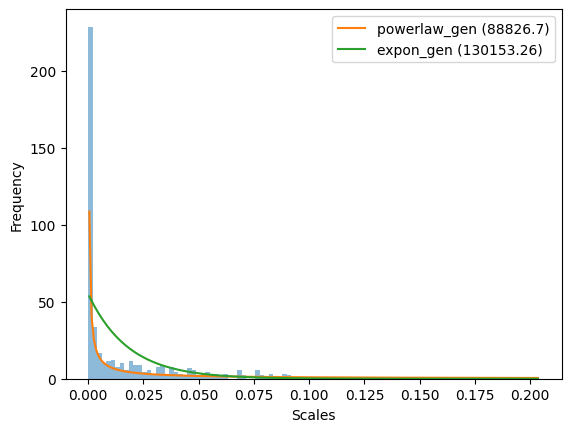

In [23]:
p = pyidd.PyIDD(verbose=1)
p.fit(diff_arr)

# After fitting, you can get distribution sorted by Sum of Squered Error that fit your data, so the first distribution is the distribution that is closer to your data
p.get_distributions()

# You can also plot distributions and your data to see this visualy. top=10 means that you want to plot top 10 distributions that match your data
p.plot(top=3)
plt.savefig('../results/distribution_fit.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

Calculating best minimal value for power law fit
Power-law exponent: 4.842908493413153
xmin: 0.076037


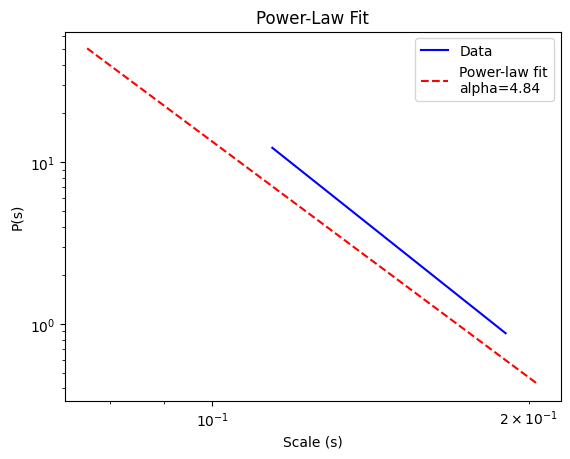

R: 0.740078269478187, p-value: 0.49366990479272255


In [24]:
import numpy as np
import powerlaw
import matplotlib.pyplot as plt

# Fit the degree distribution to a power-law
fit = powerlaw.Fit(diff_arr)

# Extract the power-law exponent
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin

print(f"Power-law exponent: {alpha}")
print(f"xmin: {xmin}")

# Plot the degree distribution and the power-law fit
fig, ax = plt.subplots()
fit.plot_pdf(ax=ax, color='b')
fit.power_law.plot_pdf(ax=ax, color='r', linestyle='--')
plt.xlabel("Scale (s)")
plt.ylabel("P(s)")
plt.title("Power-Law Fit")
plt.xscale('log')
plt.yscale('log')
plt.legend(['Data', f'Power-law fit\nalpha={alpha:.2f}'])
plt.savefig('../results/power_law_fit.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Perform KS test
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"R: {R}, p-value: {p}")

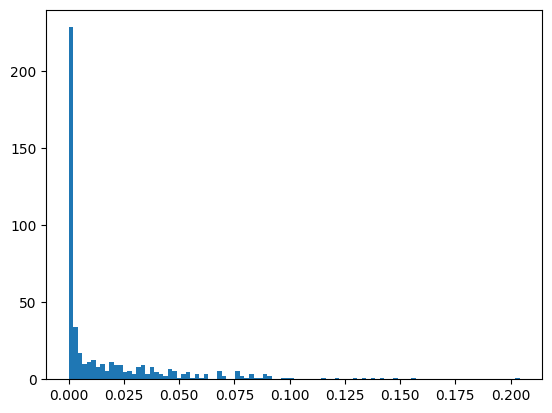

In [25]:
#histogram of the diff_arr
hist1 = plt.hist(diff_arr, bins=100,density=True)

Power law exponent: 1.547272997504918


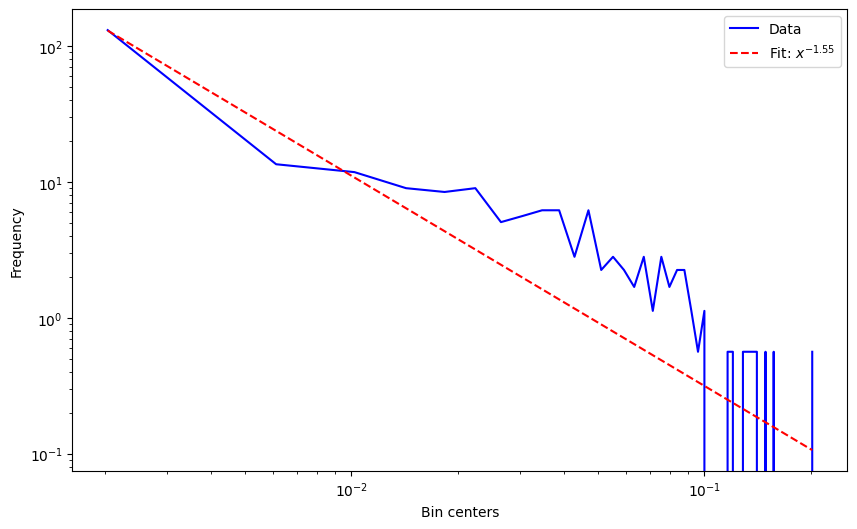

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data
data = diff_arr  # Replace this with your actual data

# Create histogram
hist, bin_edges = np.histogram(data, bins=50, density=True)

# Bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Power law function
def power_law(x, a, b):
    return a * np.power(x, -b)

# Fit the power law function to the histogram data
popt, pcov = curve_fit(power_law, bin_centers, hist)

# Extract the power law exponent
power_law_exponent = popt[1]

print(f"Power law exponent: {power_law_exponent}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(bin_centers, hist, 'b-', label='Data')
plt.loglog(bin_centers, power_law(bin_centers, *popt), 'r--', label=f'Fit: $x^{{-{power_law_exponent:.2f}}}$')
plt.xlabel('Bin centers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


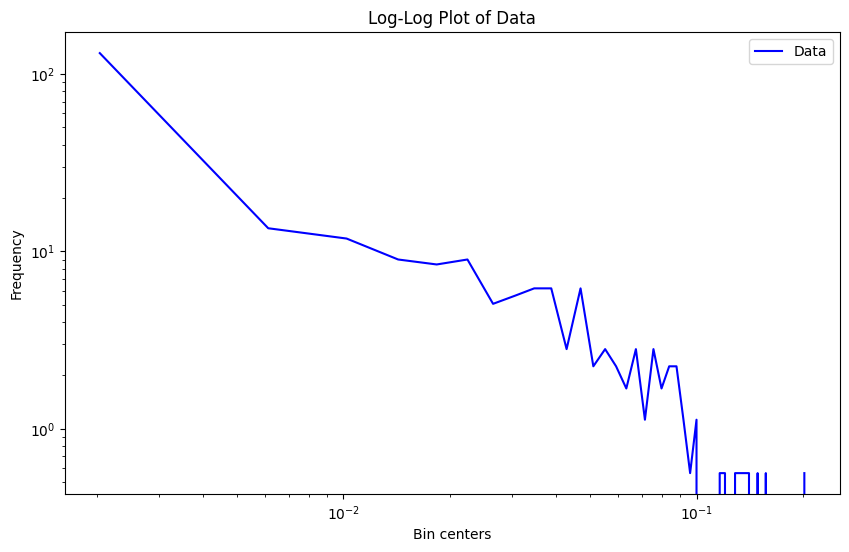

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

# Sample data
data = diff_arr  # Replace this with your actual data

# Create a histogram
hist, bin_edges = np.histogram(data, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(bin_centers, hist, 'b-', label='Data')
plt.xlabel('Bin centers')
plt.ylabel('Frequency')
plt.title('Log-Log Plot of Data')
plt.legend()
plt.show()


Calculating best minimal value for power law fit
Log-likelihood ratio (R): 0.740078269478187
p-value: 0.49366990479272255


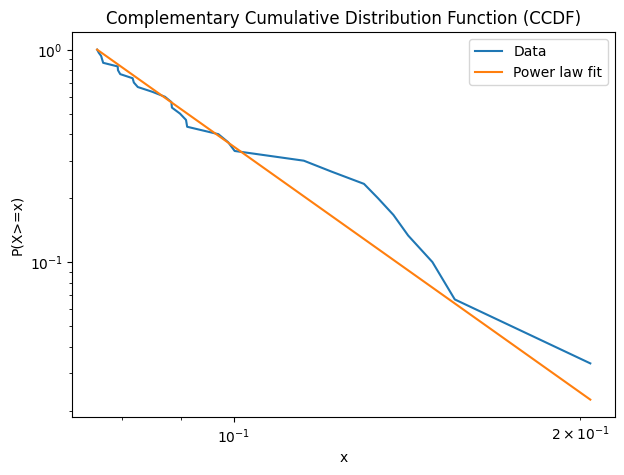

In [28]:
import powerlaw

# Fit the power-law model
fit = powerlaw.Fit(data)

# Plot the CDF of the data with the power-law fit
plt.figure(figsize=(7, 5))
ax1 = plt.gca()
fit.plot_ccdf(ax = ax1,label='Data')
fit.power_law.plot_ccdf(ax=ax1,label='Power law fit')
plt.title('Complementary Cumulative Distribution Function (CCDF)')
plt.xlabel('x')
plt.ylabel('P(X>=x)')
plt.legend()
# plt.show()
plt.savefig('./../figure/powerlaw_fit.pdf',dpi=300,format='pdf')

# Compare the power-law fit to other distributions
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Log-likelihood ratio (R): {R}")
print(f"p-value: {p}")

In [29]:
# Statistical tests
fit = powerlaw.Fit(data)

# Compare power-law to exponential
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Power law vs Exponential:\nR: {R}, p: {p}")

# # Compare power-law to lognormal
# R, p = fit.distribution_compare('power_law', 'lognormal')
# print(f"Power law vs Lognormal:\nR: {R}, p: {p}")


Calculating best minimal value for power law fit
Power law vs Exponential:
R: 0.740078269478187, p: 0.49366990479272255


# Node Degree and Diffusion Scale Correlation

In [30]:
# desikan_roi_path = './../data/desikan_roi_zhengwu.mat'
# desikan_indx2lbl_cortical_path = './../data/index_to_label_map/desikan-killiany/desikan_killiany_cortical_index_to_label.mat'
# desikan_indx2lbl_subcortical_path = './../data/index_to_label_map/desikan-killiany/zhengwu_desikan_killiany_subcortical_index_to_label_SCs.txt'

# desikan_roi_index_cortical = sio.loadmat(desikan_roi_path)['cortical']
# desikan_indx2lbl_cortical = sio.loadmat(desikan_indx2lbl_cortical_path)['desikan_killiany_cortical_index_to_label_struct']
# desikan_roi_index_subcortical = sio.loadmat(desikan_roi_path)['subcortical']
# desikan_indx2lbl_subcortical = np.loadtxt(desikan_indx2lbl_subcortical_path,dtype='str')[:,:2]

sc_labels_path = './../data/sc_labels.txt'
fc_labels_path = './../data/fc_labels.txt'

sc_labels = np.loadtxt(sc_labels_path,dtype='str')
fc_labels = np.loadtxt(fc_labels_path,dtype='str')

In [12]:
indxCon = []
for i in sc_labels:
    indxCon.append(np.where(fc_labels==i)[0][0])

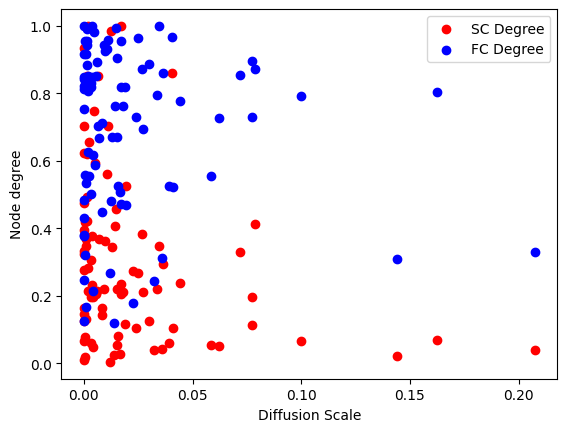

In [13]:
# i=10
sc_node_degree = np.zeros(87)
fc_node_degree = np.zeros(87)
# plt.figure(figsize=(10, 20))
for i in range(1058):
    sc_node_degree += np.sum(sc_data[i], axis=0)
    fc_node_degree += np.sum(fc_data[i], axis=0)[indxCon]
sc_node_degree/=np.max(sc_node_degree)
fc_node_degree/=np.max(fc_node_degree)
    # plt.subplot(5, 2, i+1)
truthArr = sc_node_degree>0.5
plt.scatter(diff_arr,sc_node_degree, c='r',label='SC Degree',marker='o')
plt.scatter(diff_arr,fc_node_degree, c='b',label='FC Degree',marker='o')
plt.ylabel('Node degree')
plt.xlabel('Diffusion Scale')
plt.legend()

# Power law exponent

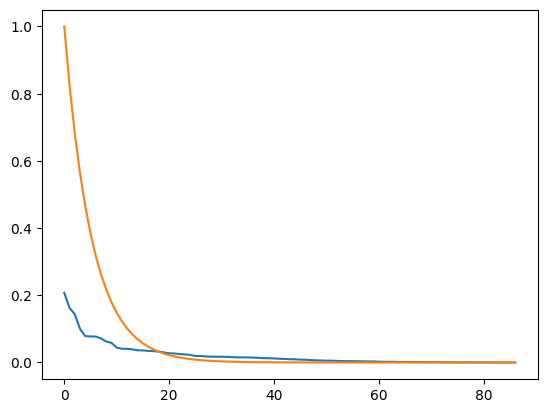

In [14]:
sorted_diff_arr = np.sort(diff_arr)[::-1]
plt.plot(sorted_diff_arr)
exp_con = 0.19110513
plt.plot(np.exp(-exp_con*np.arange(87)))

In [15]:
from scipy.optimize import curve_fit

# Define the exponential function
def func(x,m):
    return m*x#np.exp(-b * x)

# Generate some x values
x = np.log(np.arange(len(sorted_diff_arr))+1e-8)

# Use curve_fit to fit the exponential function to the data
popt, pcov = curve_fit(func, x, np.log(sorted_diff_arr))

# popt contains the optimal parameters for a and b
b = popt

print(f"The exponent which best fits the curve is {b}")

The exponent which best fits the curve is [-1.2020546]


/tmp/ipykernel_615523/2542252144.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(x),np.log(sorted_diff_arr))


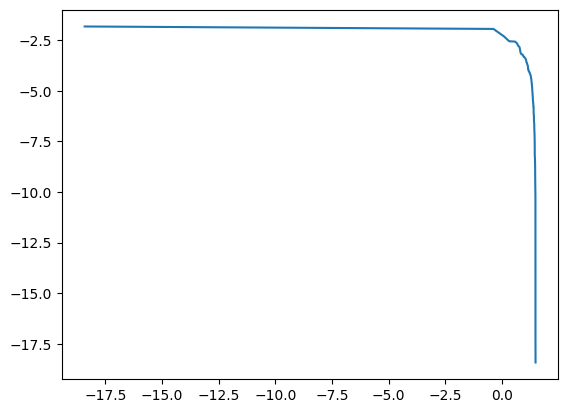

In [16]:
plt.plot(np.log(x),np.log(sorted_diff_arr))